# Lab 4: Enhancing the Bike Sharing System

Welcome to **Lab 4** of the Modeling & Simulation course! In this laboratory session, we will build upon the foundations laid in the previous labs to enhance our bike-sharing system simulation. This lab introduces the concept of **time slot-specific probabilities**, allowing you to model varying bike usage patterns throughout the day. Additionally, you will implement bike maintenance and downtime, develop a rebalancing mechanism, track customer satisfaction, and undertake a **graded assignment** to design and implement a comprehensive simulation project.

---

## Table of Contents

1. [Recap of Previous Labs](#recap)
2. [Introduction to Time Slot-Specific Probabilities](#time-slots)
   - [Understanding Time Slots](#understanding-time-slots)
3. [Implementing Time Slot-Specific Probabilities](#implementing-time-slots)
   - [Defining Time Slots](#defining-time-slots)
4. [Graded Assignment Overview](#assignment)

---

## <a name="recap"></a>1. Recap of Previous Labs

### Lab 1: Python Introduction
- Gained proficiency in Python programming.
- Learned fundamental programming concepts such as variables, data types, control structures, functions, and basic I/O operations.

### Lab 2: Basic Bike Sharing System Modeling
- Developed a simplified bike-sharing system using Python classes.
- Modeled entities such as stations, bikes, and trips.
- Implemented basic trip generation and analyzed system behavior over a short period.

### Lab 3: Introduction to SimPy
- Introduced SimPy, a discrete-event simulation library in Python.
- Reimplemented the bike-sharing system using SimPy constructs like environments, processes, and resources.
- Explored extensions including variable trip durations, rebalancing strategies, and customer satisfaction tracking.

---

## <a name="time-slots"></a>2. Introduction to Time Slot-Specific Probabilities

In real-world scenarios, bike usage varies throughout the day. To simulate this variability, we introduce **time slot-specific probabilities**. This enhancement allows the simulation to reflect different demand levels during various periods, such as morning rush hours and midday.

### <a name="understanding-time-slots"></a>Understanding Time Slots

- **Time Slots:** Defined periods within a day where bike trip probabilities differ.
- **Recurring Pattern:** Time slots repeat every simulated day, enabling multi-day simulations.
- **Example Time Slots:**
  - **Morning Start (0-120 minutes):** Initial hours with increasing demand.
  - **Midday (120-720 minutes):** Peak hours with stable high demand.

### <a name="mapping-time"></a>Mapping Simulation Time to Real-Time

To create realistic simulations, map simulation minutes to actual day times.

- **Simulation Start Time:** 6:00 AM
- **Morning Start:** 6:00 AM - 8:00 AM (0-120 minutes)
- **Midday:** 8:00 AM - 6:00 PM (120-720 minutes)
- **Simulation Duration:** 20 days (12 hours/day) → 14400 minutes

---

## <a name="implementing-time-slots"></a>3. Implementing Time Slot-Specific Probabilities

### <a name="defining-time-slots"></a>Defining Time Slots

Define time slots with specific trip probability matrices within a single day. Use the modulo operation to map the current simulation time to the appropriate time slot.

```python
# Define time slots for a single day
time_slots = [
    {
        'name': 'morning_start',
        'start': 0,       # 0 minutes into the day (6:00 AM)
        'end': 120,       # 2 hours
        'prob_matrix': {
            ('A', 'B'): 0.4,
            ('B', 'A'): 0.6,
            ('A', 'C'): 0.2,
            ('C', 'A'): 0.5,
            ('B', 'C'): 0.3,
            ('C', 'B'): 0.4,
            ('A', 'D'): 0.3,
            ('D', 'A'): 0.2,
        }
    },
    {
        'name': 'midday',
        'start': 120,      # 2 hours into the day (8:00 AM)
        'end': 720,        # 12 hours total (6:00 PM)
        'prob_matrix': {
            ('A', 'B'): 0.2,
            ('B', 'A'): 0.3,
            ('A', 'C'): 0.1,
            ('C', 'A'): 0.2,
            ('B', 'C'): 0.25,
            ('C', 'B'): 0.35,
            ('A', 'D'): 0.15,
            ('D', 'A'): 0.25,
        }
    }
    # Add more time slots if needed
]

# Define default probability matrix if no slot matches
default_prob_matrix = {
    ('A', 'B'): 0.05,
    ('B', 'A'): 0.05,
    ('A', 'C'): 0.05,
    ('C', 'A'): 0.05,
    ('B', 'C'): 0.05,
    ('C', 'B'): 0.05,
    ('A', 'D'): 0.05,
    ('D', 'A'): 0.05,
}


## <a name="assignment"></a>Graded Assignment Overview

Design and implement an enhanced bike-sharing system simulation using **SimPy**, incorporating advanced features to model a realistic and complex environment. Your simulation should build upon the concepts learned in previous labs and include the following components:

---

Your simulation must include the following elements:

### 1. Multiple Stations:

- **Minimum of Four stations** with varying capacities and initial bike counts.
- Each station should have a unique name, capacity, and initial number of bikes.

### 2. Time-Dependent Trip Probabilities:

- Implement trip probabilities that change based on different time slots (e.g., morning start, midday).
- Define at least **two distinct time slots** with different probability matrices.
- Ensure that time slots are **recurring daily** over the simulation period.

### 3. Bike Maintenance and Downtime:

- Model bike failures with a specified failure probability during trips.
- Implement a repair process that handles broken bikes, making them unavailable until repaired. The implementation details are up to your imagination.
- Track and report the number of bikes under maintenance.

### 4. Rebalancing Mechanism:

- Develop a rebalancing strategy to redistribute bikes between stations based on current demand and bike levels.
- Rebalancing should occur at regular intervals (e.g., every 20 minutes) and follow defined criteria.

### 5. Customer Satisfaction Tracking:

- Track the number of **unhappy customers** who cannot rent a bike due to unavailability.
- Track the number of **unhappy customers** who cannot return a bike due to full stations.

### 6. Data Collection and Visualization:

- Collect data on **bike levels** at each station over time.
- Collect data on **broken bikes** and maintenance activities.
- Collect data on **customer satisfaction** metrics.
- Generate plots to visualize:
  - **Bike levels** at each station over time.
  - **Number of bikes under maintenance**.
  - **Customer satisfaction metrics** (e.g., unhappy customers over time).

### 7. Simulation:

- Allow the simulation to run for a configurable duration (e.g., **20 days**).
- Parameters such as the number of stations, capacities, initial bikes, trip probabilities, maintenance rates, rebalancing intervals, and simulation duration should be easily adjustable.
- Simulate and observe the system with various parameters.

---

#### (Optional) Money Earning Mechanism:

- Introduce a system where the bike-sharing service earns **money based on bike rentals** (e.g., per hour rented).
- Track and report **total earnings** over the simulation period.

## What to Look For in Your Simulations

The primary objective of this lab is to enable you to create a realistic and dynamic simulation of a bike-sharing system that accounts for daily usage patterns, system maintenance, and operational strategies. Things to look for:

* Bike Availability: Assess how well the rebalancing mechanism maintains adequate bike levels across stations.
* Maintenance Impact: Evaluate the effect of bike failures on system performance and customer satisfaction.
* Customer Satisfaction: Analyze the number of unhappy customers and identify patterns or causes.

Write down a couple of observations from your simulations to accompany the presentation of your system.

## Grading

You will present your work in the upcoming laboratory, showing your system implementation and 1-3 simulations that you ran. The simulations should be accompanied by visual plots and you are encouraged to present any interesting observations about your system (e.g. with environment setup X the customer dissatisfaction drops significantly when increasing the rebalancing frequency to value y).

The project grade will be determined by the grade of completion of your system (how much of the project task has been implemented), as well as your understanding of it. The latter will be assessed through some basic questions about your model/system/simulations.

*Note: Where not strongly specified, you are free to design a subsystem/idea however you find best fit, e.g. points 2, 3 and 4 can have many different subsystem designs. There is no one correct way to do it.

0. **Prerequisites**

In [117]:
!pip install simpy

import simpy
import random
import matplotlib.pyplot as plt


1. **System Components**

In [118]:
# System Constants

customer_satisfaction = {
    'unhappy_rentals': 0,
    'unhappy_returns': 0
}

repair_time = 30
repair_interval = 30
failure_chance = 0.05

rebalancing_factor_low = 0.2 # to benefit
rebalancing_factor_high = 0.7 # to donate
rebalancing_limit = 5 # transfer up to 5 bikes
rebalancing_interval = 8

monitor_bike_levels_interval = 1
monitor_maintenance_interval = 15
monitor_customer_satisfaction_interval = 5

rental_rate_per_minute = 0.25
total_earnings = 0

simulation_duration = 14400  # 20 days in minutes

In [119]:
# System Station Model

class BikeStation:
    def __init__(self, env, name, capacity, initial_bikes):
        self.env = env
        self.name = name
        self.capacity = capacity
        self.bikes = simpy.Container(env, capacity=capacity, init=initial_bikes)
        self.broken_bikes = 0
        self.unhappy_rentals = 0
        self.unhappy_returns = 0


In [120]:
# System Initialization

env = simpy.Environment()

station_fortuna = BikeStation(env, name = 'Fortuna', capacity = 10, initial_bikes = 5 )
station_lebada = BikeStation(env, name = 'Lebada', capacity = 20, initial_bikes = 20 )
station_afi = BikeStation(env, name = 'AFI', capacity = 50, initial_bikes = 30 )
station_podgoria = BikeStation(env, name = 'Podgoria', capacity = 30, initial_bikes = 30 )

stations = [ station_fortuna, station_lebada, station_afi, station_podgoria ]


In [121]:
# System Time Slots
time_slots = [
    {
        'name': 'early-morning',
        'start': 0,       # 0 minutes into the day (6:00 AM)
        'end': 60,       # 1 hours
        'prob_matrix': {
            (station_fortuna, station_fortuna): 0.4,
            (station_fortuna, station_lebada): 0.6,
            (station_fortuna, station_afi): 0.2,
            (station_fortuna, station_podgoria): 0.5,

            (station_lebada, station_fortuna): 0.1,
            (station_lebada, station_lebada): 0.4,
            (station_lebada, station_afi): 0.6,
            (station_lebada, station_podgoria): 0.1,

            (station_afi, station_fortuna): 0.2,
            (station_afi, station_lebada): 0.5,
            (station_afi, station_afi): 0.3,
            (station_afi, station_podgoria): 0.4,

            (station_podgoria, station_fortuna): 0.1,
            (station_podgoria, station_lebada): 0.2,
            (station_podgoria, station_afi): 0.3,
            (station_podgoria, station_podgoria): 0.4
        }
    },
    {
        'name': 'morning-rush',
        'start': 60,      # 1 hour into the day (7:00 AM)
        'end': 180,        # 2 hour ( until 9:00 PM)
        'prob_matrix': {
            (station_fortuna, station_fortuna): 0.7,
            (station_fortuna, station_lebada): 0.3,
            (station_fortuna, station_afi): 0.1,
            (station_fortuna, station_podgoria): 0.5,

            (station_lebada, station_fortuna): 0.2,
            (station_lebada, station_lebada): 0.3,
            (station_lebada, station_afi): 0.5,
            (station_lebada, station_podgoria): 0.2,

            (station_afi, station_fortuna): 0.5,
            (station_afi, station_lebada): 0.3,
            (station_afi, station_afi): 0.2,
            (station_afi, station_podgoria): 0.6,

            (station_podgoria, station_fortuna): 0.4,
            (station_podgoria, station_lebada): 0.5,
            (station_podgoria, station_afi): 0.1,
            (station_podgoria, station_podgoria): 0.3
        }
    },
    {
        'name': 'midday',
        'start': 180,      # 3 hours into the day (9:00 AM)
        'end': 540,          # ( until 15:00 PM)
        'prob_matrix': {
            (station_fortuna, station_fortuna): 0.1,
            (station_fortuna, station_lebada): 0.4,
            (station_fortuna, station_afi): 0.7,
            (station_fortuna, station_podgoria): 0.3,

            (station_lebada, station_fortuna): 0.4,
            (station_lebada, station_lebada): 0.2,
            (station_lebada, station_afi): 0.6,
            (station_lebada, station_podgoria): 0.3,

            (station_afi, station_fortuna): 0.2,
            (station_afi, station_lebada): 0.6,
            (station_afi, station_afi): 0.2,
            (station_afi, station_podgoria): 0.5,

            (station_podgoria, station_fortuna): 0.2,
            (station_podgoria, station_lebada): 0.3,
            (station_podgoria, station_afi): 0.4,
            (station_podgoria, station_podgoria): 0.4
      }
    },
    {
        'name': 'rush-hour',
        'start': 540,      # 9 hours into the day (15:00 PM)
        'end': 720,          # ( until 18:00 PM)
        'prob_matrix': {
            (station_fortuna, station_fortuna): 0.3,
            (station_fortuna, station_lebada): 0.5,
            (station_fortuna, station_afi): 0.3,
            (station_fortuna, station_podgoria): 0.4,

            (station_lebada, station_fortuna): 0.2,
            (station_lebada, station_lebada): 0.4,
            (station_lebada, station_afi): 0.5,
            (station_lebada, station_podgoria): 0.4,

            (station_afi, station_fortuna): 0.3,
            (station_afi, station_lebada): 0.5,
            (station_afi, station_afi): 0.1,
            (station_afi, station_podgoria): 0.2,

            (station_podgoria, station_fortuna): 0.3,
            (station_podgoria, station_lebada): 0.2,
            (station_podgoria, station_afi): 0.4,
            (station_podgoria, station_podgoria): 0.2
      }
    },
    {
        'name': 'evening',
        'start': 720,      # 12 hours into the day (18:00 PM)
        'end': 960,          # ( until 22:00 PM )
        'prob_matrix': {
            (station_fortuna, station_fortuna): 0.3,
            (station_fortuna, station_lebada): 0.5,
            (station_fortuna, station_afi): 0.4,
            (station_fortuna, station_podgoria): 0.1,

            (station_lebada, station_fortuna): 0.2,
            (station_lebada, station_lebada): 0.3,
            (station_lebada, station_afi): 0.5,
            (station_lebada, station_podgoria): 0.1,

            (station_afi, station_fortuna): 0.4,
            (station_afi, station_lebada): 0.3,
            (station_afi, station_afi): 0.2,
            (station_afi, station_podgoria): 0.5,

            (station_podgoria, station_fortuna): 0.7,
            (station_podgoria, station_lebada): 0.4,
            (station_podgoria, station_afi): 0.2,
            (station_podgoria, station_podgoria): 0.1
      }
    }
]

# Define default probability matrix if no slot matches
default_prob_matrix = {
            (station_fortuna, station_fortuna): 0.1,
            (station_fortuna, station_lebada): 0.1,
            (station_fortuna, station_afi): 0.2,
            (station_fortuna, station_podgoria): 0.1,

            (station_lebada, station_fortuna): 0.1,
            (station_lebada, station_lebada): 0.1,
            (station_lebada, station_afi): 0.1,
            (station_lebada, station_podgoria): 0.2,

            (station_afi, station_fortuna): 0.2,
            (station_afi, station_lebada): 0.1,
            (station_afi, station_afi): 0.1,
            (station_afi, station_podgoria): 0.2,

            (station_podgoria, station_fortuna): 0.2,
            (station_podgoria, station_lebada): 0.2,
            (station_podgoria, station_afi): 0.2,
            (station_podgoria, station_podgoria): 0.2
}

current_slot = [None]

In [122]:
# System Processes

def process_adjust_time_slot(env, time_slots, current_slot):
    slot_durations = {
        'early-morning': 60,   # 1 hour
        'morning-rush': 120,   # 2 hours
        'midday': 360,         # 6 hours
        'rush-hour': 180,      # 3 hours
        'evening': 240         # 4 hours
    }
    while True:
        for slot, duration in slot_durations.items():
            current_slot[0] = slot  # Update the current slot (as a mutable list for reference in other functions)
            print(f"{env.now:.2f}: Changing time slot to {slot}")
            yield env.timeout(duration)

def process_bike_maintenance(env, stations):
    while True:
        for station in stations:
            if station.broken_bikes > 0:
                yield env.timeout(repair_time)
                station.broken_bikes -= 1
                print(f"{env.now:.2f}: Bike repaired at {station.name}.")
                station.bikes.put(1)
            else:
                yield env.timeout(repair_interval)

def process_rebalance_bikes(env, stations):
    while True:
        for station in stations:
            if station.bikes.level < station.capacity * rebalancing_factor_low:
                for donor_station in stations:
                    if donor_station.bikes.level > donor_station.capacity * rebalancing_factor_high:

                        transfer_bikes = min(donor_station.bikes.level - (donor_station.capacity * rebalancing_factor_high), rebalancing_limit)

                        donor_station.bikes.get(transfer_bikes)
                        station.bikes.put(transfer_bikes)

                        print(f'{env.now:.2f}: Transferred {transfer_bikes} bikes from {donor_station.name} to {station.name}')
                        break
        yield env.timeout(rebalancing_interval)


def process_bike_trip(env, start_station, end_station, current_prob_matrix, customer_satisfaction):

    global total_earnings

    if start_station.bikes.level > 0:
      # Start station ok
        yield start_station.bikes.get(1)
        print(f"{env.now:.2f}: Bike rented from {start_station.name} to {end_station.name}")

        trip_duration = random.randint(10, 60)
        trip_earning = trip_duration * rental_rate_per_minute

        if random.random() < failure_chance:
            start_station.broken_bikes += 1
            trip_earning *= -1

            print(f"{env.now:.2f}: Bike failed during trip, moved to maintenance. Lost: {trip_earning}")
            yield env.timeout(trip_duration)
        else:
            yield env.timeout(trip_duration)
            if end_station.bikes.level < end_station.capacity:
              # End station ok
                yield end_station.bikes.put(1)
                total_earnings += trip_earning
                print(f"{env.now:.2f}: Bike returned to {end_station.name}. Gained: {trip_earning}")
            else:
                # End station is full, customer is unhappy
                customer_satisfaction['unhappy_returns'] += 1
                print(f"{env.now:.2f}: End station {end_station.name} is full. Customer unhappy.")
    else:
        # No bikes available at the start station
        customer_satisfaction['unhappy_rentals'] += 1
        print(f"{env.now:.2f}: No bikes available at {start_station.name}. Customer unhappy.")

def get_current_prob_matrix(current_time):
    for slot in time_slots:
        if slot['start'] <= current_time < slot['end']:
            return slot['prob_matrix']
    return default_prob_matrix

def process_trip_generator(env, stations, customer_satisfaction):
    while True:

        current_time = env.now

        current_prob_matrix = get_current_prob_matrix(current_time)

        start_station = random.choice(stations)
        destinations = [station for station in stations]

        end_station = random.choices(destinations,
                                     weights=[current_prob_matrix.get((start_station, station), 0)
                                              for station in destinations])[0]

        env.process(process_bike_trip(env, start_station, end_station, current_prob_matrix, customer_satisfaction))

        # Wait before generating the next trip (control trip frequency here)
        trip_interval = random.expovariate(1 / 5)  # Average interval of 5 minutes between trips
        yield env.timeout(trip_interval)





2. **Data Collection**

In [123]:
# Monitoring

trip_log = {station.name: [] for station in stations}
maintenance_log = {station.name: [] for station in stations}
customer_satisfaction_log = []

def monitor_trips(env, stations, trip_log):
    while True:
        for station in stations:
            trip_log[station.name].append((env.now, station.bikes.level))
        yield env.timeout(monitor_bike_levels_interval)

def monitor_maintenance(env, stations, maintenance_log):
    while True:
        for station in stations:
                maintenance_log[station.name].append((env.now, station.broken_bikes))
        yield env.timeout(monitor_maintenance_interval)

def monitor_customer_satisfaction(env, customer_satisfaction, customer_satisfaction_log):
    while True:
        customer_satisfaction_log.append((env.now, customer_satisfaction['unhappy_rentals']
                                          , customer_satisfaction['unhappy_returns']))
        yield env.timeout(monitor_customer_satisfaction_interval)



In [124]:
# Graph Plotting

def plot_trips():
  for station_name, levels in trip_log.items():
      times, counts = zip(*levels)
      plt.plot(times, counts, label=station_name)
  plt.xlabel('Time (minutes)')
  plt.ylabel('Number of Bikes')
  plt.title('Bike Levels at Each Station Over Time')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_maintenance():
  for station_name, levels in maintenance_log.items():
    maintenance_times, maintenance_counts = zip(*levels)
    plt.plot(maintenance_times, maintenance_counts, label=station_name)
  plt.xlabel('Time (minutes)')
  plt.ylabel('Number of Bikes Under Maintenance')
  plt.title('Maintenance Levels at Each Station Over Time')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_customer_satisfaction():
    times, unhappy_rentals, unhappy_returns = zip(*customer_satisfaction_log)

    plt.plot(times, unhappy_rentals, color='blue', label="Unhappy Rentals")
    plt.plot(times, unhappy_returns, color='red', label="Unhappy Returns")

    plt.xlabel('Time (minutes)')
    plt.ylabel('Number of Unhappy Customers')
    plt.title('Customer Satisfaction Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


**3. Simulation**

Streaming output truncated to the last 5000 lines.
2387.93: Bike rented from Podgoria to Fortuna
2388.56: Bike rented from Podgoria to Lebada
2388.56: Bike failed during trip, moved to maintenance. Lost: -10.25
2391.52: Bike rented from AFI to AFI
2393.21: Bike rented from Podgoria to Fortuna
2394.04: Bike returned to Fortuna. Gained: 13.25
2396.65: Bike rented from Fortuna to AFI
2396.89: Bike returned to Podgoria. Gained: 7.5
2397.43: Bike returned to Lebada. Gained: 2.5
2403.95: Bike rented from AFI to AFI
2404.28: Bike rented from Fortuna to Lebada
2404.28: Bike failed during trip, moved to maintenance. Lost: -6.75
2408.00: Transferred 2.0 bikes from AFI to Fortuna
2408.41: Bike returned to AFI. Gained: 5.25
2408.56: Bike rented from Fortuna to AFI
2410.16: Bike rented from AFI to Podgoria
2418.30: Bike returned to Podgoria. Gained: 12.25
2418.65: Bike returned to AFI. Gained: 5.5
2420.27: Bike rented from Fortuna to Podgoria
2420.95: Bike rented from Podgoria to Podgoria
2422.34: 

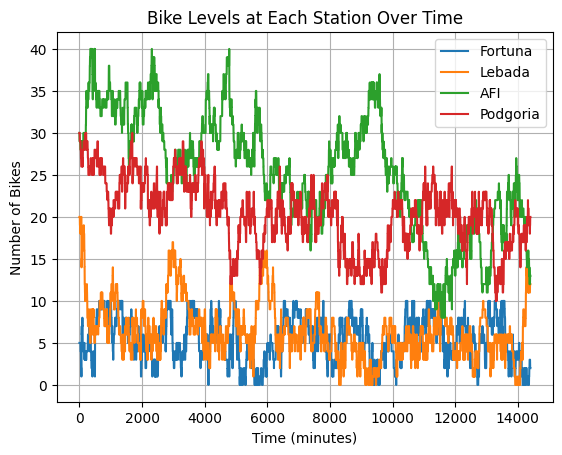

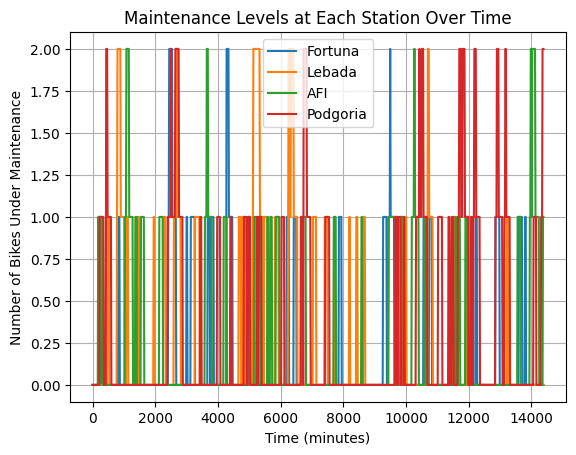

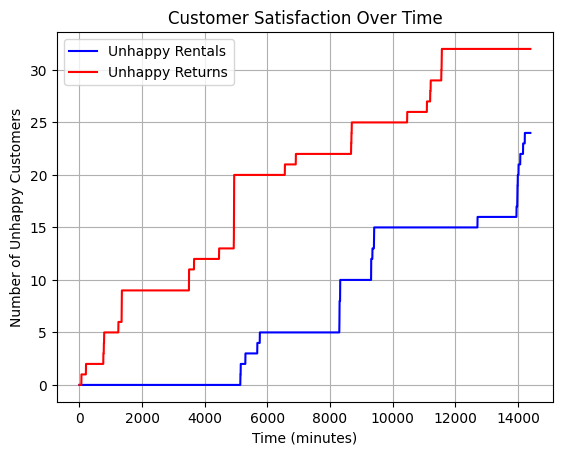


Total earnings over the simulation period: 22755.50


In [125]:
def run_simulation(duration):

    env.process(process_adjust_time_slot(env, time_slots, current_slot))
    env.process(process_bike_maintenance(env, stations))
    env.process(process_rebalance_bikes(env, stations))
    env.process(process_trip_generator(env, stations, customer_satisfaction))

    env.process(monitor_trips(env, stations, trip_log))
    env.process(monitor_maintenance(env, stations, maintenance_log))
    env.process(monitor_customer_satisfaction(env, customer_satisfaction, customer_satisfaction_log))

    env.run(until=duration)

    plot_trips()
    plot_maintenance()
    plot_customer_satisfaction()

    print(f"\nTotal earnings over the simulation period: {total_earnings:.2f}")
run_simulation(simulation_duration)

**4. Observations**


In [126]:
'''
  Some rules:
      A bike can be returned to any other station, even the one it was taken from.
      Each succesful trip earns money, while a bike failure costs the system as much money as if
      the trip were to succed. Also, an unhappy return means a free trip.

  A first issue I noticed while working with my system is that at a certain point in time, one by one, each
station would remain without bikes. This was due to the fact that I was not returning bikes after maintenance.
This caused the 'unhappy returns' to be a constant 0 and the 'unhappy rentals' to spike up exponentially.
  After I managed to get the simulation to run normally, I noticed that certain stations would need constant, but small
rebalancing, causing the 'unhappy returns' rise up significantly higher than the 'unhappy returns'.
  e.g Station 'Fortuna' would always be issued to rebalance Station 'Lebada', most likely due to the probability matrices.
  After adjusting the trip probabilities for the problematic stations, I noticed the 'unhappy rentals/returns' dynamic remained
mostly the same, it just slightly improved. So I decreased the rebalancing lower limit and made more frequent rebalancing,
so the stations would be hardly left with no bikes.
  Lastly, after these modifications, I observed the 'unhappy returns' finally surpass the 'unhappy rentals', while still
remaining balanced in regards to each other. After a couple more runs, they beautifully fluctuated in balanced manner.

'''

"\n  Some rules:\n      A bike can be returned to any other station, even the one it was taken from.\n      Each succesful trip earns money, while a bike failure costs the system as much money as if\n      the trip were to succed. Also, an unhappy return means a free trip.\n\n  A first issue I noticed while working with my system is that at a certain point in time, one by one, each\nstation would remain without bikes. This was due to the fact that I was not returning bikes after maintenance.\nThis caused the 'unhappy returns' to be a constant 0 and the 'unhappy rentals' to spike up exponentially.\n  After I managed to get the simulation to run normally, I noticed that certain stations would need constant, but small\nrebalancing, causing the 'unhappy returns' rise up significantly higher than the 'unhappy returns'.\n  e.g Station 'Fortuna' would always be issued to rebalance Station 'Lebada', most likely due to the probability matrices.\n  After adjusting the trip probabilities for the 